<a href="https://colab.research.google.com/github/sushma-snk/Customer-Service-Request-Analysis/blob/main/311_Service_Requests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of NYC-311 Service Request Data**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
data = pd.read_csv("/gdrive/My Drive/Project_1/311_Service_Requests_from_2010_to_Present.csv") # Read train data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**1. Understand the dataset**

1. Identify the shape of dataset

In [ ]:
shape_dataset = data.shape
print("Shape of Dataset : ", shape_dataset)

Shape of Dataset :  (300698, 53)


In [ ]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


2. Identify variables with null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [ ]:
missing_data_cols=[]
for col in data.columns:
    if data[col].isna().sum() != 0:
         missing_data_cols.append(col)
print("Variables with missing data :\n", missing_data_cols)

Variables with missing data :
 ['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Due Date', 'Resolution Action Updated Date', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'School Region', 'School Code', 'School Zip', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location']


**2. Perform basic data exploratory analysis**

1. Utilize missing value treatment

In [ ]:
# Identify the columns which has only null values or more than 3/4th len of dataset
delete_null_cols = []
for cols in missing_data_cols:
  if data[cols].isna().sum() == len(data) or data[cols].isna().sum() >= 3*len(data)/4:
    delete_null_cols.append(cols)
print(delete_null_cols)

['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name']


In [ ]:
# Drop the columns which has only null values
new_data = data.drop(delete_null_cols, axis=1)
new_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
# Drop the columns with 1 unique value
delete_one_unique_value_cols = []
for i in new_data.columns:
  if new_data[i].nunique() == 1:
    delete_one_unique_value_cols.append(i)
print(delete_one_unique_value_cols)

['Agency', 'Facility Type', 'School Region', 'School Code', 'School Zip', 'School Not Found']


In [ ]:
new_data1 = new_data.drop(delete_one_unique_value_cols, axis=1)
new_data1.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Park Borough,School Name,School Number,School Phone Number,School Address,School City,School State,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
new_data1 = new_data1.dropna(subset=['Closed Date'])
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      298534 non-null  int64  
 1   Created Date                    298534 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency Name                     298534 non-null  object 
 4   Complaint Type                  298534 non-null  object 
 5   Descriptor                      292625 non-null  object 
 6   Location Type                   298406 non-null  object 
 7   Incident Zip                    298027 non-null  float64
 8   Incident Address                254137 non-null  object 
 9   Street Name                     254137 non-null  object 
 10  Cross Street 1                  250971 non-null  object 
 11  Cross Street 2                  250881 non-null  object 
 12  Address Type    

In [ ]:
# Replace missing values of numerical data with mean
# Replace missing values of categorical data with "Unknown"

for cols in new_data1.columns:
  if new_data1[cols].dtypes == 'float' or new_data1[cols].dtypes == 'int':
    if new_data1[cols].isna().sum() != 0:
      new_data1[cols].replace(np.nan, new_data1[cols].mean(),inplace=True)
  elif new_data1[cols].dtypes == 'object':
    if new_data1[cols].isna().sum() != 0:
      new_data1[cols].replace(np.nan, "Unknown", inplace=True)

new_data1.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Park Borough,School Name,School Number,School Phone Number,School Address,School City,School State,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


2. Analayse the date column and remove the entries if it has an incorrect timeline

In [ ]:
new_data1["Created Date"]=pd.to_datetime(new_data1['Created Date'])
new_data1["Closed Date"]=pd.to_datetime(new_data1['Closed Date'])
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298534 entries, 0 to 300697
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      298534 non-null  int64         
 1   Created Date                    298534 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency Name                     298534 non-null  object        
 4   Complaint Type                  298534 non-null  object        
 5   Descriptor                      298534 non-null  object        
 6   Location Type                   298534 non-null  object        
 7   Incident Zip                    298534 non-null  float64       
 8   Incident Address                298534 non-null  object        
 9   Street Name                     298534 non-null  object        
 10  Cross Street 1                  298534 non-null  object 

In [ ]:
new_data1.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Park Borough,School Name,School Number,School Phone Number,School Address,School City,School State,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


3. Draw frequency plot for city-wise complaints

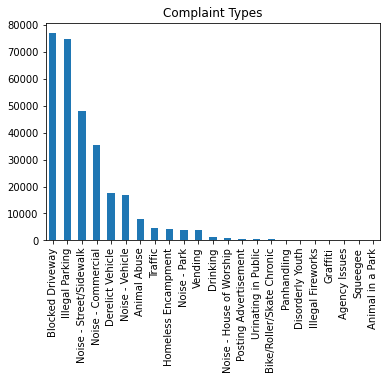

In [ ]:
new_data1['Complaint Type'].value_counts().plot(kind='bar',title='Complaint Types')
plt.show()

In [ ]:
citywise_complaints = pd.crosstab(index=new_data1["City"], columns=new_data1["Complaint Type"])
citywise_complaints

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,38,0,0,35,27,2,1,1,4,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,0,125,0,15,2618,351,3,35,4,32,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,0,116,12,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,0,37,0,0,377,198,1,1,3,2,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,0,7,0,1,95,89,2,1,0,1,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1415,0,20,12754,1952,63,188,9,247,...,79,547,8890,3396,19,17,0,355,51,379
BROOKLYN,0,2394,0,111,28147,5179,72,257,43,857,...,340,1555,13354,5176,49,45,0,1085,136,515
CAMBRIA HEIGHTS,0,11,0,0,147,115,0,0,0,5,...,2,0,25,77,0,0,0,6,0,0


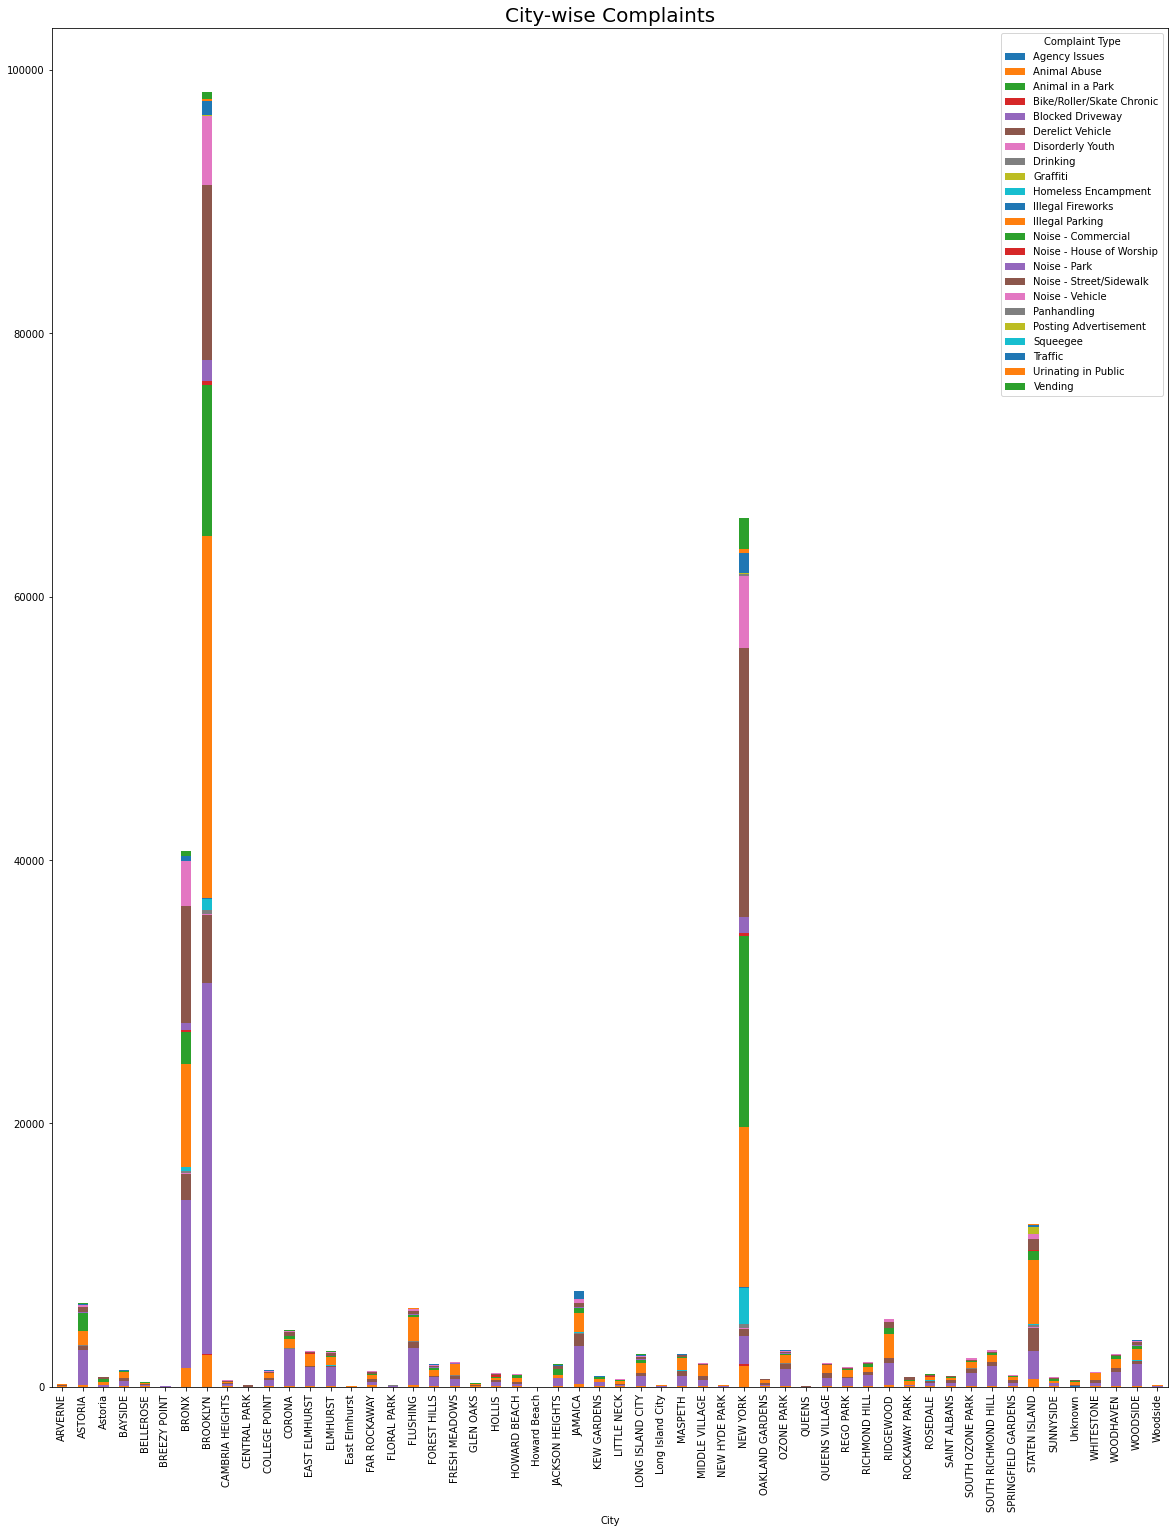

In [ ]:
citywise_complaints.plot(kind="bar", figsize=(20,25), stacked=True)
plt.title('City-wise Complaints',fontsize=20)
plt.show()

4. Draw scatter and hexbin plots for complaint concentration across Brooklyn.

In [ ]:
data_brooklyn = new_data1[new_data1['City'] == 'BROOKLYN']

In [ ]:
data_brooklyn.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Park Borough,School Name,School Number,School Phone Number,School Address,School City,School State,Latitude,Longitude,Location
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,...,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,...,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:00,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,...,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:00,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,...,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:00,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,...,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"


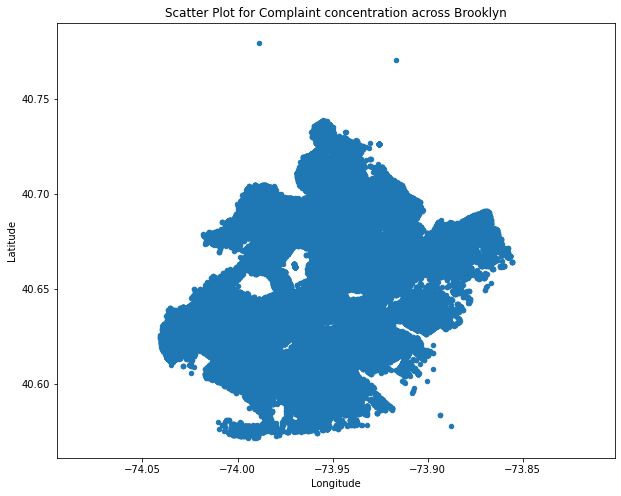

In [ ]:
data_brooklyn.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(10,8),title = 'Scatter Plot for Complaint concentration across Brooklyn').axis('equal')
plt.show()

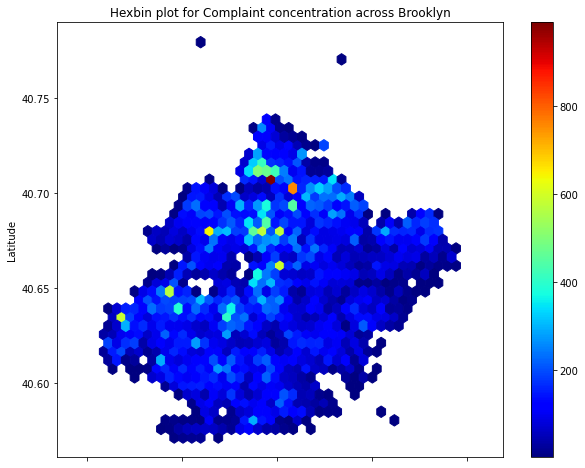

In [ ]:
data_brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40, colormap = 'jet', mincnt=1, title = 'Hexbin plot for Complaint concentration across Brooklyn', figsize=(10,8)).axis('equal')
plt.show()

**3. Find major types of complaints**

1. Plot a bar graph of count vs. complaint types

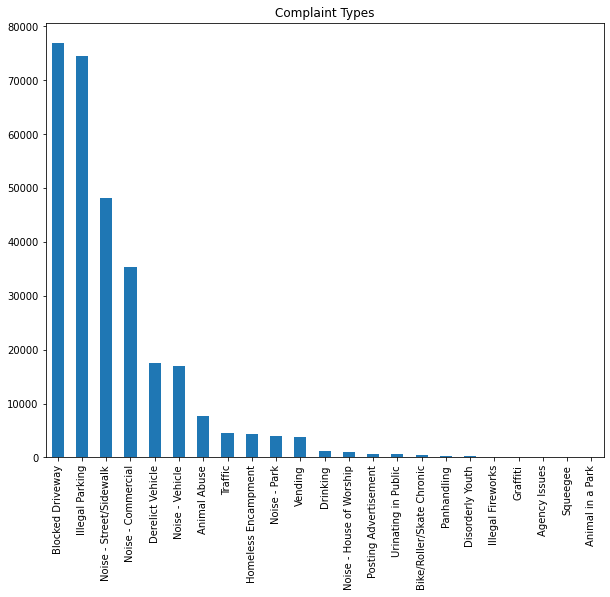

In [ ]:
new_data1['Complaint Type'].value_counts().plot(kind='bar',title='Complaint Types', figsize = (10,8))
plt.show()

2. Find the top 10 types of complaints

In [ ]:
complaints = new_data1.groupby('Complaint Type')
top_10_complaints = complaints['Complaint Type'].value_counts().nlargest(10)
print("Top 10 Complaint Types:\n")
top_10_complaints

Top 10 Complaint Types:



Complaint Type           Complaint Type         
Blocked Driveway         Blocked Driveway           76810
Illegal Parking          Illegal Parking            74532
Noise - Street/Sidewalk  Noise - Street/Sidewalk    48076
Noise - Commercial       Noise - Commercial         35247
Derelict Vehicle         Derelict Vehicle           17588
Noise - Vehicle          Noise - Vehicle            17033
Animal Abuse             Animal Abuse                7768
Traffic                  Traffic                     4496
Homeless Encampment      Homeless Encampment         4416
Noise - Park             Noise - Park                4022
Name: Complaint Type, dtype: int64

3. Display the types of complaints in each city in a separate dataset

In [ ]:
complaints_in_each_city = new_data1[['Complaint Type','City']]
complaints_in_each_city

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
300692,Noise - Commercial,NEW YORK
300694,Blocked Driveway,RICHMOND HILL
300695,Noise - Commercial,BROOKLYN
300696,Noise - Commercial,BRONX


**4. Visualize the major types of complaints in each city.**

In [ ]:
new_data1.groupby(['City','Complaint Type']).size()

City      Complaint Type         
ARVERNE   Animal Abuse                38
          Blocked Driveway            35
          Derelict Vehicle            27
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            11
          Derelict Vehicle             2
          Illegal Parking            100
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 778, dtype: int64

**5. Check the average response time across various types of complaints.**

In [ ]:
# Create response closing time column by subtracted closed data from created date
new_data1['Request_Closing_Time'] = (new_data1['Closed Date'] - new_data1['Created Date']).dt.total_seconds()

average_response_time = new_data1.groupby(['City', 'Complaint Type']).Request_Closing_Time.mean().to_frame()
average_response_time.head(30)

Request_Closing_Time
City    Complaint Type                                 
ARVERNE Animal Abuse                        7753.052632
        Blocked Driveway                    9093.485714
        Derelict Vehicle                   10685.592593
        Disorderly Youth                   12928.500000
        Drinking                             859.000000
        Graffiti                            5520.000000
        Homeless Encampment                 6533.250000
        Illegal Parking                     8338.913793
        Noise - Commercial                  8234.000000
        Noise - House of Worship            5623.909091
        Noise - Park                        4620.000000
        Noise - Street/Sidewalk             7172.620690
        Noise - Vehicle                     6695.571429
        Panhandling                         3720.000000
        Urinating in Public                 2491.000000
        Vending                             1740.000000
ASTORIA Animal Abuse                       18000.608000
        Bike/Roller/Skate Chronic           6261.533333
        Blocked Driveway                   17338.024064
        Derelict Vehicle                   34881.299145
        Disorderly Youth                   10449.333333
        Drinking                           17000.714286
        Graffiti                           50742.250000
        Homeless Encampment                17703.312500
        Illegal Fireworks                   9984.500000
        Illegal Parking                    17400.207865
        Noise - Commercial                 11278.904872
        Noise - House of Worship            7280.000000
        Noise - Park                       10782.393443
        Noise - Street/Sidewalk            12424.189119

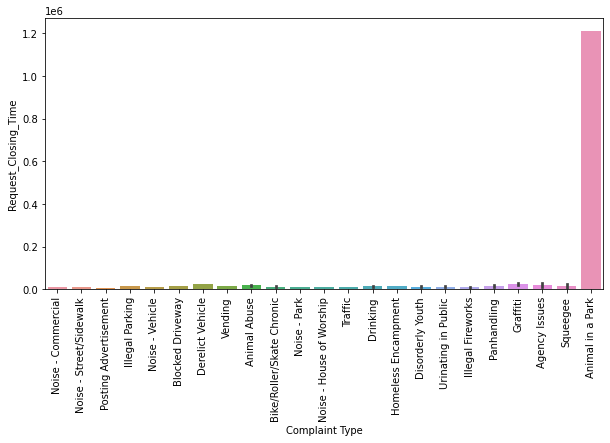

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Complaint Type', y='Request_Closing_Time', data=new_data1.sort_values('Request_Closing_Time'))
plt.xticks(rotation=90)
plt.show()

In [ ]:
new_data1.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,School Name,School Number,School Phone Number,School Address,School City,School State,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422.0


**6. Identify the significant variables by performing a statistical analysis using p-values and chi-square values.**